In [163]:
import pandas as pd
import numpy as np
import hashlib

In [164]:
# uvoz podatkov: iz txt datoteke
# opcija za branje velikih df
# pravilen separator...

f500 = pd.read_csv("./f500.csv")
f500


,company,rank,revenues,revenue_change,profits,assets,profit_change,ceo,industry,sector,previous_rank,country,hq_location,website,years_on_global_500_list,employees,total_stockholder_equity
0,Walmart,1,485873,0.8,13643.0,198825,-7.2,C. Douglas McMillon,General Merchandisers,Retailing,1,USA,"Bentonville, AR",http://www.walmart.com,23,2300000,77798
1,State Grid,2,315199,-4.4,9571.3,489838,-6.2,Kou Wei,Utilities,Energy,2,China,"Beijing, China",http://www.sgcc.com.cn,17,926067,209456
2,Sinopec Group,3,267518,-9.1,1257.9,310726,-65.0,Wang Yupu,Petroleum Refining,Energy,4,China,"Beijing, China",http://www.sinopec.com,19,713288,106523
3,China National Petroleum,4,262573,-12.3,1867.5,585619,-73.7,Zhang Jianhua,Petroleum Refining,Energy,3,China,"Beijing, China",http://www.cnpc.com.cn,17,1512048,301893
4,Toyota Motor,5,254694,7.7,16899.3,437575,-12.3,Akio Toyoda,Motor Vehicles and Parts,Motor Vehicles & Parts,8,Japan,"Toyota, Japan",http://www.toyota-global.com,23,364445,157210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Teva Pharmaceutical Industries,496,21903,11.5,329.0,92890,-79.3,Yitzhak Peterburg,Pharmaceuticals,Health Care,0,Israel,"Petach Tikva, Israel",http://www.tevapharm.com,1,56960,33337
496,New China Life Insurance,497,21796,-13.3,743.9,100609,-45.6,Wan Feng,"Insurance: Life, Health (stock)",Financials,427,China,"Beijing, China",http://www.newchinalife.com,2,54378,8507
497,Wm. Morrison Supermarkets,498,21741,-11.3,406.4,11630,20.4,David T. Potts,Food and Drug Stores,Food & Drug Stores,437,Britain,"Bradford, Britain",http://www.morrisons.com,13,77210,5111
498,TUI,499,21655,-5.5,1151.7,16247,195.5,Friedrich Joussen,Travel Services,Business Services,467,Germany,"Hanover, Germany",http://www.tuigroup.com,23,66779,3006


In [165]:
# opcija za branje po kosih
chunks = pd.read_csv("./seaslug.txt", sep='\t',encoding='utf-8', chunksize=10)
for chunk in chunks:
    print(chunk)


   Time  Percent
0    99    0.067
1    99    0.133
2    99    0.067
3    99    0.000
4    99    0.000
5     0    0.500
6     0    0.467
7     0    0.857
8     0    0.500
9     0    0.357
    Time  Percent
10     0    0.533
11     5    0.467
12     5    0.467
13     5    0.125
14     5    0.400
15     5    0.214
16     5    0.400
17    10    0.067
18    10    0.067
19    10    0.333
    Time  Percent
20    10    0.333
21    10    0.133
22    10    0.133
23    15    0.267
24    15    0.286
25    15    0.333
26    15    0.214
27    15    0.000
28    15    0.000
29    20    0.267
    Time  Percent
30    20    0.200
31    20    0.267
32    20    0.437
33    20    0.077
34    20    0.067
35    25    0.133
36    25    0.267
37    25    0.412
38    25    0.000
39    25    0.067
    Time  Percent
40    25    0.133
41    30    0.000
42    30    0.071
43    30    0.000
44    30    0.067
45    30    0.067
46    30    0.133


In [166]:
# oblika df (vrstice,stolpci)
f500.shape

(500, 17)

In [167]:
f500.head(7)

,company,rank,revenues,revenue_change,profits,assets,profit_change,ceo,industry,sector,previous_rank,country,hq_location,website,years_on_global_500_list,employees,total_stockholder_equity
0,Walmart,1,485873,0.8,13643.0,198825,-7.2,C. Douglas McMillon,General Merchandisers,Retailing,1,USA,"Bentonville, AR",http://www.walmart.com,23,2300000,77798
1,State Grid,2,315199,-4.4,9571.3,489838,-6.2,Kou Wei,Utilities,Energy,2,China,"Beijing, China",http://www.sgcc.com.cn,17,926067,209456
2,Sinopec Group,3,267518,-9.1,1257.9,310726,-65.0,Wang Yupu,Petroleum Refining,Energy,4,China,"Beijing, China",http://www.sinopec.com,19,713288,106523
3,China National Petroleum,4,262573,-12.3,1867.5,585619,-73.7,Zhang Jianhua,Petroleum Refining,Energy,3,China,"Beijing, China",http://www.cnpc.com.cn,17,1512048,301893
4,Toyota Motor,5,254694,7.7,16899.3,437575,-12.3,Akio Toyoda,Motor Vehicles and Parts,Motor Vehicles & Parts,8,Japan,"Toyota, Japan",http://www.toyota-global.com,23,364445,157210
5,Volkswagen,6,240264,1.5,5937.3,432116,NaN,Matthias Muller,Motor Vehicles and Parts,Motor Vehicles & Parts,7,Germany,"Wolfsburg, Germany",http://www.volkswagen.com,23,626715,97753
6,Royal Dutch Shell,7,240033,-11.8,4575.0,411275,135.9,Ben van Beurden,Petroleum Refining,Energy,5,Netherlands,"The Hague, Netherlands",http://www.shell.com,23,89000,186646


In [168]:
f500.tail(6)

,company,rank,revenues,revenue_change,profits,assets,profit_change,ceo,industry,sector,previous_rank,country,hq_location,website,years_on_global_500_list,employees,total_stockholder_equity
494,Xinjiang Guanghui Industry Investment,495,21919,31.1,251.8,31957,49.9,Shang Jiqiang,Trading,Wholesalers,0,China,"Urumqi, China",http://www.guanghui.com,1,65616,4563
495,Teva Pharmaceutical Industries,496,21903,11.5,329.0,92890,-79.3,Yitzhak Peterburg,Pharmaceuticals,Health Care,0,Israel,"Petach Tikva, Israel",http://www.tevapharm.com,1,56960,33337
496,New China Life Insurance,497,21796,-13.3,743.9,100609,-45.6,Wan Feng,"Insurance: Life, Health (stock)",Financials,427,China,"Beijing, China",http://www.newchinalife.com,2,54378,8507
497,Wm. Morrison Supermarkets,498,21741,-11.3,406.4,11630,20.4,David T. Potts,Food and Drug Stores,Food & Drug Stores,437,Britain,"Bradford, Britain",http://www.morrisons.com,13,77210,5111
498,TUI,499,21655,-5.5,1151.7,16247,195.5,Friedrich Joussen,Travel Services,Business Services,467,Germany,"Hanover, Germany",http://www.tuigroup.com,23,66779,3006
499,AutoNation,500,21609,3.6,430.5,10060,-2.7,Michael J. Jackson,Specialty Retailers,Retailing,0,USA,"Fort Lauderdale, FL",http://www.autonation.com,12,26000,2310


In [169]:
#1.2.5-prikazi informacije
f500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   company                   500 non-null    object 
 1   rank                      500 non-null    int64  
 2   revenues                  500 non-null    int64  
 3   revenue_change            498 non-null    float64
 4   profits                   499 non-null    float64
 5   assets                    500 non-null    int64  
 6   profit_change             436 non-null    float64
 7   ceo                       500 non-null    object 
 8   industry                  500 non-null    object 
 9   sector                    500 non-null    object 
 10  previous_rank             500 non-null    int64  
 11  country                   500 non-null    object 
 12  hq_location               500 non-null    object 
 13  website                   500 non-null    object 
 14  years_on_g

In [170]:
#tipi spremenljvk po stolpcih
f500.dtypes

company                      object
rank                          int64
revenues                      int64
revenue_change              float64
profits                     float64
assets                        int64
profit_change               float64
ceo                          object
industry                     object
sector                       object
previous_rank                 int64
country                      object
hq_location                  object
website                      object
years_on_global_500_list      int64
employees                     int64
total_stockholder_equity      int64
dtype: object

In [171]:
#1.2.6.-prikazi realno porabo pomnilnika v MB
f500.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   company                   500 non-null    object 
 1   rank                      500 non-null    int64  
 2   revenues                  500 non-null    int64  
 3   revenue_change            498 non-null    float64
 4   profits                   499 non-null    float64
 5   assets                    500 non-null    int64  
 6   profit_change             436 non-null    float64
 7   ceo                       500 non-null    object 
 8   industry                  500 non-null    object 
 9   sector                    500 non-null    object 
 10  previous_rank             500 non-null    int64  
 11  country                   500 non-null    object 
 12  hq_location               500 non-null    object 
 13  website                   500 non-null    object 
 14  years_on_g

In [172]:
f500.shape

(500, 17)

In [173]:
## funkcijo compare_dataframes lahko uporabimo za preverjanje ce sta dva dataframe-a identicna - npr. ce dobimo neke rezultate po razlicnih metodah, kot v primeru spodaj.
def calc_hash(dataframe):
    df_as_string = dataframe.to_string()
    hash_object = hashlib.sha256()
    hash_object.update(df_as_string.encode('utf-8'))
    hex_dig = hash_object.hexdigest()
    return hex_dig

def compare_dataframes(df1, df2):
    hash_1 = calc_hash(df1)
    hash_2 = calc_hash(df2)
    if hash_1 == hash_2:
        print("Dataframes are the same!")
    else:
        print("NOT the same!")

# 1.3.1 odstranite zadnji dve vrstici z nepotrebnimi podatki
## Nacin 1
df2 = f500.iloc[:-2 , :]
print(df2.shape)
## Nacin 2
df3 = f500.drop(f500.tail(2).index)
print(df3.shape)

compare_dataframes(df2,df3)





(498, 17)
(498, 17)
Dataframes are the same!


In [174]:
f500.sample(10)

,company,rank,revenues,revenue_change,profits,assets,profit_change,ceo,industry,sector,previous_rank,country,hq_location,website,years_on_global_500_list,employees,total_stockholder_equity
276,Greenland Holding Group,277,37240,12.8,1085.2,105495,-1.0,Zhang Yuliang,Real estate,Financials,311,China,"Shanghai, China",http://www.ldjt.com.cn,6,39887,8333
333,Sinomach,334,32237,-8.2,502.0,39142,-34.5,Ren Hongbin,Industrial Machinery,Industrials,293,China,"Beijing, China",http://www.sinomach.com.cn,7,115390,8930
478,LG Display,479,22840,-9.0,781.4,20606,-8.6,Sang-Beom Han,"Electronics, Electrical Equip.",Technology,429,South Korea,"Seoul, South Korea",http://www.lgdisplay.com,6,49094,10729
179,FedEx,180,50365,6.1,1820.0,46064,73.3,Frederick W. Smith,"Mail, Package, and Freight Delivery",Transportation,192,USA,"Memphis, TN",http://www.fedex.com,23,335767,13784
480,U.S. Bancorp,481,22744,5.8,5888.0,445964,0.2,Andrew J. Cecere,Banks: Commercial and Savings,Financials,490,USA,"Minneapolis, MN",http://www.usbank.com,12,71191,47298
304,Accenture,305,34798,5.7,4111.9,20609,34.7,Pierre Nanterme,Information Technology Services,Technology,312,Ireland,"Dublin, Ireland",http://www.accenture.com,16,384000,7555
63,Nestle,64,90814,-1.6,8659.2,129824,-8.1,Ulf Mark Schneider,Food Consumer Products,"Food, Beverages & Tobacco",66,Switzerland,"Vevey, Switzerland",http://www.nestle.com,23,328000,63573
293,Mitsubishi Heavy Industries,294,36122,7.2,809.6,49205,52.3,Shunichi Miyanaga,Industrial Machinery,Industrials,307,Japan,"Tokyo, Japan",http://www.mhi.com,23,82728,15074
60,Wells Fargo,61,94176,4.6,21938.0,1930115,-4.2,Timothy J. Sloan,Banks: Commercial and Savings,Financials,67,USA,"San Francisco, CA",http://www.wellsfargo.com,20,269100,199581
477,Tencent Holdings,478,22871,39.7,6185.9,56968,35.0,Pony Ma,Internet Services and Retailing,Technology,0,China,"Shenzhen, China",http://www.tencent.com,1,38775,25128


In [175]:
# 1.3.2-odstranimo nepotrebne stolpce - imena teh stolpcev so shranjena v seznamu "to_drop"
# v naolgi je potrebno uporabiti inplace metodo - v tej rešitvi da ne spreminjamo df za naprej ustvarimo nov dataframe
to_drop = ['website','total_stockholder_equity']
df_dropeed = f500.drop(columns=to_drop)
# df = df.drop(columns=to_drop, inplace=True)
df_dropeed.shape

(500, 15)

In [176]:
#1.3.3 Preimenovanje imen stolpcev. Uporabi podan slovar.
new_names = {'company': 'company_name', 'ceo':'ceo_name'}
f500.rename(columns=new_names, inplace = True)
f500

,company_name,rank,revenues,revenue_change,profits,assets,profit_change,ceo_name,industry,sector,previous_rank,country,hq_location,website,years_on_global_500_list,employees,total_stockholder_equity
0,Walmart,1,485873,0.8,13643.0,198825,-7.2,C. Douglas McMillon,General Merchandisers,Retailing,1,USA,"Bentonville, AR",http://www.walmart.com,23,2300000,77798
1,State Grid,2,315199,-4.4,9571.3,489838,-6.2,Kou Wei,Utilities,Energy,2,China,"Beijing, China",http://www.sgcc.com.cn,17,926067,209456
2,Sinopec Group,3,267518,-9.1,1257.9,310726,-65.0,Wang Yupu,Petroleum Refining,Energy,4,China,"Beijing, China",http://www.sinopec.com,19,713288,106523
3,China National Petroleum,4,262573,-12.3,1867.5,585619,-73.7,Zhang Jianhua,Petroleum Refining,Energy,3,China,"Beijing, China",http://www.cnpc.com.cn,17,1512048,301893
4,Toyota Motor,5,254694,7.7,16899.3,437575,-12.3,Akio Toyoda,Motor Vehicles and Parts,Motor Vehicles & Parts,8,Japan,"Toyota, Japan",http://www.toyota-global.com,23,364445,157210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Teva Pharmaceutical Industries,496,21903,11.5,329.0,92890,-79.3,Yitzhak Peterburg,Pharmaceuticals,Health Care,0,Israel,"Petach Tikva, Israel",http://www.tevapharm.com,1,56960,33337
496,New China Life Insurance,497,21796,-13.3,743.9,100609,-45.6,Wan Feng,"Insurance: Life, Health (stock)",Financials,427,China,"Beijing, China",http://www.newchinalife.com,2,54378,8507
497,Wm. Morrison Supermarkets,498,21741,-11.3,406.4,11630,20.4,David T. Potts,Food and Drug Stores,Food & Drug Stores,437,Britain,"Bradford, Britain",http://www.morrisons.com,13,77210,5111
498,TUI,499,21655,-5.5,1151.7,16247,195.5,Friedrich Joussen,Travel Services,Business Services,467,Germany,"Hanover, Germany",http://www.tuigroup.com,23,66779,3006


In [177]:
# 1.3.4. iskanje podvojenih vrstic.
# za to vajo uporabim drug df, ki ima podvojene vrstice
laptops = pd.read_csv("./INPUT_laptops.csv", encoding='Latin-1')

print(laptops.shape[0]) # stevilo vseh vrstic
print(laptops.duplicated().value_counts()) # False - unikatne, True - podovjene

laptops.drop_duplicates(inplace=True)
print(laptops.shape[0]) # ostanejo le unikatne

1303
False    1275
True       28
dtype: int64
1275


In [178]:
# 1.3.5 Odstranjevanje manjkajočih vrednosti
autos = pd.read_csv("./autos.csv", encoding='Latin-1')
autos.head(10)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50
5,2016-03-21 13:47:45,Chrysler_Grand_Voyager_2.8_CRD_Aut.Limited_Sto...,privat,Angebot,"$7,900",test,bus,2006,automatik,150,voyager,"150,000km",4,diesel,chrysler,NaN,2016-03-21 00:00:00,0,22962,2016-04-06 09:45:21
6,2016-03-20 17:55:21,VW_Golf_III_GT_Special_Electronic_Green_Metall...,privat,Angebot,$300,test,limousine,1995,manuell,90,golf,"150,000km",8,benzin,volkswagen,NaN,2016-03-20 00:00:00,0,31535,2016-03-23 02:48:59
7,2016-03-16 18:55:19,Golf_IV_1.9_TDI_90PS,privat,Angebot,"$1,990",control,limousine,1998,manuell,90,golf,"150,000km",12,diesel,volkswagen,nein,2016-03-16 00:00:00,0,53474,2016-04-07 03:17:32
8,2016-03-22 16:51:34,Seat_Arosa,privat,Angebot,$250,test,NaN,2000,manuell,0,arosa,"150,000km",10,NaN,seat,nein,2016-03-22 00:00:00,0,7426,2016-03-26 18:18:10
9,2016-03-16 13:47:02,Renault_Megane_Scenic_1.6e_RT_Klimaanlage,privat,Angebot,$590,control,bus,1997,manuell,90,megane,"150,000km",7,benzin,renault,nein,2016-03-16 00:00:00,0,15749,2016-04-06 10:46:35


In [179]:
print(f"Original size = {autos.size}")

# Izpiši število manjkajočih vrednosti za vsak stolpec v pandas Series obliki
autos.isnull().sum()

# Odstranite vse vrstice v naših podatkih za katere imata stolpca "vehicleType" in "gearbox" manjkajoče vrednosti
# Način 1 - najbolj optimalna resitev
autos_1 = autos.dropna(axis=0, subset=["vehicleType", "gearbox"], how='all')
print(autos_1.size)
# Način 2
autos_2 = autos.drop(autos.loc[autos["vehicleType"].isnull() & autos["gearbox"].isnull() , :].index)
print(autos_2.size)
# Način 3
autos_3 = autos.loc[~(pd.isnull(autos['vehicleType']) & pd.isnull(autos['gearbox']))]
print(autos_2.size)
# primerjaj ce sta dataframe-a enaka
compare_dataframes(autos_1, autos_2)
compare_dataframes(autos_1, autos_3)

Original size = 1000000
973140
973140
973140
Dataframes are the same!
Dataframes are the same!


In [180]:
# Vse manjkajoče vrednosti v stolpcu "fuelType" nadomesti z besedilom 'Fuel type unknown'

# Najprej prikazemo razporeditev po vrednostih, vkljucimo tudi izpis vsote NaN vrednosti
print(autos["fuelType"].value_counts(dropna=False)) 

# Nadomestimo in ponovno izpisemo
autos.loc[autos["fuelType"].isnull(), "fuelType"] = 'Fuel type unknown'
print(autos["fuelType"].value_counts(dropna=False)) 

benzin     30107
diesel     14567
NaN         4482
lpg          691
cng           75
hybrid        37
andere        22
elektro       19
Name: fuelType, dtype: int64
benzin               30107
diesel               14567
Fuel type unknown     4482
lpg                    691
cng                     75
hybrid                  37
andere                  22
elektro                 19
Name: fuelType, dtype: int64


In [181]:
# 1.3.6) Transformiranje podatkov.
# Stolpec 'seller' vsebuje razlicne tipe prodajalcev, spremenimo vrednosti na podlagi slovarja vrste_prodajalcev
vrste_prodajalcev = {'privat':'private_seller', 'gewerblich':'company_seller'}

print(autos['seller'].value_counts())

autos['seller']=autos["seller"].map(vrste_prodajalcev)

print(autos['seller'].value_counts())


privat        49999
gewerblich        1
Name: seller, dtype: int64
private_seller    49999
company_seller        1
Name: seller, dtype: int64


In [182]:
#1.3.7 Sprememba  vrednosti v določenih stolpcih
print(autos['fuelType'].value_counts())
autos.loc[autos['fuelType'] == 'benzin', 'fuelType'] = 'Super95'
autos.loc[autos['fuelType'] == 'cng', 'fuelType'] = 'Gas'
print(autos['fuelType'].value_counts())

benzin               30107
diesel               14567
Fuel type unknown     4482
lpg                    691
cng                     75
hybrid                  37
andere                  22
elektro                 19
Name: fuelType, dtype: int64
Super95              30107
diesel               14567
Fuel type unknown     4482
lpg                    691
Gas                     75
hybrid                  37
andere                  22
elektro                 19
Name: fuelType, dtype: int64


In [183]:
#1.3.8 -dodatno urejanje
# stolpec 'Model Name' nastavimo kot indeks nasih podatkov.
laptops.set_index('Model Name', inplace=True)
laptops

,Manufacturer,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price (Euros)
Model Name,,,,,,,,,,,,
MacBook Pro,Apple,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,"1339,69"
Macbook Air,Apple,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,"898,94"
250 G6,HP,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,"575,00"
MacBook Pro,Apple,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,"2537,45"
MacBook Pro,Apple,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,"1803,60"
...,...,...,...,...,...,...,...,...,...,...,...,...
Yoga 500-14ISK,Lenovo,2 in 1 Convertible,"14.0""",IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows,10,1.8kg,"638,00"
Yoga 900-13ISK,Lenovo,2 in 1 Convertible,"13.3""",IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows,10,1.3kg,"1499,00"
IdeaPad 100S-14IBR,Lenovo,Notebook,"14.0""",1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows,10,1.5kg,"229,00"


In [184]:
# Če kateri izmed tekstovnih stolpcev vsebuje enake vrednosti ga odstranite
laptops = pd.read_csv("./INPUT_laptops.csv", encoding='Latin-1')

# simuliramo 2 stolpca ki imaza samo enake vrednosti in en stolpec ki ni tekstovni (objekt) in ga zato ne smemo odstraniti, čeprav ima same enake vrednosti
laptops["za_odstraniti_1"] = 'odstrani me'
laptops["za_odstraniti_2"] = 'odstrani me'
laptops["ne_smemo_odstraniti"] = 999
print(laptops.shape)

# subset of DF with only object types
laptops_text = laptops.select_dtypes(include=['object'])
# determine column names to drop in original dataframe
columns_to_drop = laptops_text.columns[laptops_text.nunique(dropna=True) == 1]
# finally drop columns
laptops.drop(columns=columns_to_drop, inplace=True)
print(laptops.shape)
laptops


(1303, 16)
(1303, 14)


,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price (Euros),ne_smemo_odstraniti
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,"1339,69",999
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,"898,94",999
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,"575,00",999
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,"2537,45",999
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,"1803,60",999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,"14.0""",IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows,10,1.8kg,"638,00",999
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,"13.3""",IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows,10,1.3kg,"1499,00",999
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,"14.0""",1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows,10,1.5kg,"229,00",999
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,"15.6""",1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows,10,2.19kg,"764,00",999


In [185]:
# 1.3.9 čiščenje vrendnosti in sprememba podatkovnih tipov
# Stolpce ['Screen Size', 'RAM','Weight','Storage'] pretvorite v podatkovni tip integer. Pri tem je potrebno paziti, da uporabimo najboljo optimalen subtip (int8, int16) glede na vsebovanje vrednosti.
# Iz vseh stolpcev najprej izluscite stevilske vrednosti
# Iz stolpca

import numpy as np

laptops = pd.read_csv("./INPUT_laptops.csv", encoding='Latin-1')

# primeri stevilskih obsegov razlicnih podatkovnih tipov
# info = np.iinfo(np.int8)
# print("Minimum value int8: ", info.min)
# print("Maximum value int8: ", info.max)
# info = np.iinfo(np.uint8)
# print("Minimum value uint8: ", info.min)
# print("Maximum value uint8: ", info.max)
# info = np.iinfo(np.int16)
# print("Minimum value int16: ", info.min)
# print("Maximum value int16: ", info.max)
# info = np.iinfo(np.int32)
# print("Minimum value int32: ", info.min)
# print("Maximum value int32: ", info.max)
# info = np.iinfo(np.int64)
# print("Minimum value int64: ", info.min)
# print("Maximum value int64: ", info.max)
# info = np.finfo(np.float16)
# print("Minimum value float16: ", info.min)
# print("Maximum value float16: ", info.max)
# print("Precision:", info.precision)
# info = np.finfo(np.float32)
# print("Minimum value float32: ", info.min)
# print("Maximum value float32: ", info.max)
# print("Precision:", info.precision)

# izluscimo stevilske vrednosti iz teksta in pretvorimo
# 1 Opcija - pretvarjanje s numeric metodo in downcastanjem
laptops["screen_size"] = pd.to_numeric(laptops['Screen Size'].str.replace('"', ""), downcast='float')
laptops["ram_size"] = pd.to_numeric(laptops["RAM"].str.replace("GB", ""), downcast='integer')
laptops["weight_kg"] = pd.to_numeric(laptops["Weight"].str.replace("kgs", "").str.replace("kg",""), downcast='float')
laptops["storage_size"] = pd.to_numeric(laptops[" Storage"].str.split().str[0].str.replace("GB","").str.replace("TB",""),downcast='integer')
laptops["price_eur"] = pd.to_numeric(laptops["Price (Euros)"].str.replace(',', "."), downcast='float')

# 2 Opcija - pretvarjanje direktno na eksplicitno določen tip (v teh primerih moramo prej pregledati max in min vrednosti in izbrati optimalne tipe)
# laptops["screen_size"] = laptops['Screen Size'].str.replace('"', "").astype(np.float32)
# laptops["ram_size"] = laptops["RAM"].str.replace("GB", "").astype(np.int8)
# laptops["weight_kg"] = laptops["Weight"].str.replace("kgs", "").str.replace("kg","").astype(np.float32)
# laptops["storage_size"] = laptops[" Storage"].str.split().str[0].str.replace("GB","").str.replace("TB","").astype(np.int16)

print(laptops.dtypes)
# laptops.describe()
laptops.head(10)


Manufacturer                 object
Model Name                   object
Category                     object
Screen Size                  object
Screen                       object
CPU                          object
RAM                          object
 Storage                     object
GPU                          object
Operating System             object
Operating System Version     object
Weight                       object
Price (Euros)                object
screen_size                 float32
ram_size                       int8
weight_kg                   float32
storage_size                  int16
price_eur                   float32
dtype: object


,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price (Euros),screen_size,ram_size,weight_kg,storage_size,price_eur
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,"1339,69",13.3,8,1.37,128,1339.689941
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,"898,94",13.3,8,1.34,128,898.940002
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,"575,00",15.6,8,1.86,256,575.000000
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,"2537,45",15.4,16,1.83,512,2537.449951
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,"1803,60",13.3,8,1.37,256,1803.599976
5,Acer,Aspire 3,Notebook,"15.6""",1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows,10,2.1kg,"400,00",15.6,4,2.10,500,400.000000
6,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS,X,2.04kg,"2139,97",15.4,16,2.04,256,2139.969971
7,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,"1158,70",13.3,8,1.34,256,1158.699951
8,Asus,ZenBook UX430UN,Ultrabook,"14.0""",Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows,10,1.3kg,"1495,00",14.0,16,1.30,512,1495.000000
9,Acer,Swift 3,Ultrabook,"14.0""",IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows,10,1.6kg,"770,00",14.0,8,1.60,256,770.000000


In [186]:
# se pretvorba Category v kategoricne podatke
laptops["Category"] = laptops["Category"].astype("category")
laptops.to_pickle("./laptops_analysis.pkl") # izvozimo kot pickle, category type se ohrani

In [187]:
# 1.4. Izvoz urejenih podatkov
# 1.4.1
# Pripravljene in urejene podatke izvozite v novo csv datoteko z imenom laptops_clean.csv. Za pot lahko uporabite pripravljeno spemenljivko "path_clean". Za separator uporabite ,
path_clean = './laptops_clean.csv'
laptops.to_csv(path_clean, sep=',', index=False, encoding='utf-8') # pozor - uporabimo drug encoding kot v originalu "Latin-1"


In [188]:
# TEST ČE SMO PRAVILNO ZAPISALi
df_check = pd.read_csv(path_clean, sep=',', encoding='utf-8')
df_check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              1303 non-null   object 
 1   Model Name                1303 non-null   object 
 2   Category                  1303 non-null   object 
 3   Screen Size               1303 non-null   object 
 4   Screen                    1303 non-null   object 
 5   CPU                       1303 non-null   object 
 6   RAM                       1303 non-null   object 
 7    Storage                  1303 non-null   object 
 8   GPU                       1303 non-null   object 
 9   Operating System          1303 non-null   object 
 10  Operating System Version  1133 non-null   object 
 11  Weight                    1303 non-null   object 
 12  Price (Euros)             1303 non-null   object 
 13  screen_size               1303 non-null   float64
 14  ram_size

In [189]:
# 1.4.2
# Podatke želite shraniti tudi v SQLite, tako da urejene podatke shranite še v SQLite bazo z imenom "laptops_clean.db". Za pot lahko uporabite pripravljeno spemenljivko path_clean. Za ime tabele uporabite 'laptops'
import sqlite3
from sqlalchemy import create_engine
path_clean = './laptops_clean.db'
table_name = 'laptops'

engine = create_engine(f'sqlite:///{path_clean}', echo=False)

laptops.to_sql(table_name, con=engine)


1303

In [190]:
# TEST ČE SMO PRAVILNO ZAPISALI
laptops_read_test = pd.read_sql(table_name, engine)
laptops_read_test.head(10)



,index,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price (Euros),screen_size,ram_size,weight_kg,storage_size,price_eur
0,0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,None,1.37kg,"1339,69",13.3,8,1.37,128,1339.689941
1,1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,None,1.34kg,"898,94",13.3,8,1.34,128,898.940002
2,2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,None,1.86kg,"575,00",15.6,8,1.86,256,575.000000
3,3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,None,1.83kg,"2537,45",15.4,16,1.83,512,2537.449951
4,4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,None,1.37kg,"1803,60",13.3,8,1.37,256,1803.599976
5,5,Acer,Aspire 3,Notebook,"15.6""",1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows,10,2.1kg,"400,00",15.6,4,2.10,500,400.000000
6,6,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS,X,2.04kg,"2139,97",15.4,16,2.04,256,2139.969971
7,7,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,None,1.34kg,"1158,70",13.3,8,1.34,256,1158.699951
8,8,Asus,ZenBook UX430UN,Ultrabook,"14.0""",Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows,10,1.3kg,"1495,00",14.0,16,1.30,512,1495.000000
9,9,Acer,Swift 3,Ultrabook,"14.0""",IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows,10,1.6kg,"770,00",14.0,8,1.60,256,770.000000


## DEL 2 - Analiza

In [191]:
# prikažite glavne statistične podatke za numerične z uproabo ene metode, To ponite še za kategorične podatke
df_analiza = pd.read_pickle("./laptops_analysis.pkl")

df_analiza.describe() # anaiza numericnih podatkov


,screen_size,ram_size,weight_kg,storage_size,price_eur
count,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000
mean,15.017190,8.382195,2.038734,225.721412,1123.687012
std,1.426304,5.084665,0.665475,175.142430,699.009033
min,10.100000,2.000000,0.690000,1.000000,174.000000
25%,14.000000,4.000000,1.500000,32.000000,599.000000
50%,15.600000,8.000000,2.040000,256.000000,977.000000
75%,15.600000,8.000000,2.300000,256.000000,1487.880005
max,18.400000,64.000000,4.700000,512.000000,6099.000000


In [192]:
df_analiza["Category"].describe(include="all")

count         1303
unique           6
top       Notebook
freq           727
Name: Category, dtype: object

In [193]:
df_analiza["Category"].value_counts()

Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: Category, dtype: int64

In [194]:
df_analiza.head(5)

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price (Euros),screen_size,ram_size,weight_kg,storage_size,price_eur
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,"1339,69",13.3,8,1.37,128,1339.689941
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,"898,94",13.3,8,1.34,128,898.940002
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,"575,00",15.6,8,1.86,256,575.000000
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,"2537,45",15.4,16,1.83,512,2537.449951
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,"1803,60",13.3,8,1.37,256,1803.599976


## 2.1 Analiza - laptop manufactureres
Analiziraje stolpec "Manufacturer"
- Izpišite število laptopov za posameznega proizvajalca
- 10 najbolj pogostih vrednosti zgornjega izracuna izpisite v stolpec manufacturers_top_10
- izrisite graf stevila laptopov v odvistnoti od namena (za manufacturers_top_10 Series). Uporabite funkcijo plot v knjižnici pandas. Graf naj bo tipa bar z naslovom "Laptop top manufacturers"

In [195]:
df_analiza.groupby("Manufacturer").size().sort_values(ascending=False)

Manufacturer
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Vero           4
Xiaomi         4
Google         3
Fujitsu        3
Chuwi          3
LG             3
Huawei         2
dtype: int64

In [196]:
manufacturers_top_10 = df_analiza.groupby("Manufacturer").size().sort_values(ascending=False)[:10]

<AxesSubplot: title={'center': 'Laptop top manufacturers'}, ylabel='Manufacturer'>

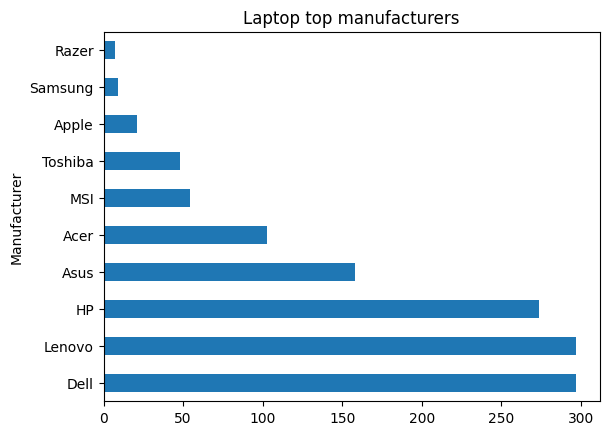

In [197]:
manufacturers_top_10.plot(kind="barh", title="Laptop top manufacturers")

## 2.2) Analiza - Povprečna vrednost glede na ostale pogoje
1. Izdelaj nov df z imenom df_dell v katerem shranite samo vrstice, ki predstavljajo laptopte tega proizvajalca
2. v df_dell shranite samo stolpca ram_size in screen_size z uproabo loc metode
3. Izračunajte povprečno vrednost stolpca ram glede na posamezen screen_size

In [198]:
df_dell = df_analiza.loc[df_analiza["Manufacturer"] == 'Dell',['screen_size','ram_size',]]

df_dell.groupby("screen_size").mean()

,ram_size
screen_size,
11.600000,4.000000
12.500000,8.000000
13.300000,9.083333
14.000000,7.238095
15.000000,4.000000
15.600000,8.459893
17.299999,16.571429


## 2.3) Analiza - Povprečna vrednost glede na ostale pogoje
1. Izdelajte nov df z imenom df_best_laptops v katerega shranite samo vrstice, ki predstavljajo:
- stolpec screen_size >= 15.6
- stolpec ram_size >= 16
2. Dobljen df grupirajte po stolpcu Manufacturer in izracunajte povprecno vrednost za stolpec price_eur. Dobljen series poimenujte best_laptops_mean
3. V grafu prikažite best_laptops_mean za vsakega proizvajalca. Uporabite graf tipa bar.

In [ ]:
df_analiza.head()

In [ ]:
df_best_laptops = df_analiza.loc[(df_analiza["ram_size"] >= 16) & (df_analiza["screen_size"] >= 15.6), :]

In [209]:
best_laptops_mean = df_best_laptops.groupby("Manufacturer").mean(["price_eur"])["price_eur"].sort_values(ascending=False)

<AxesSubplot: title={'center': 'Avg price of upper end laptops by manufacturer'}, xlabel='Manufacturer'>

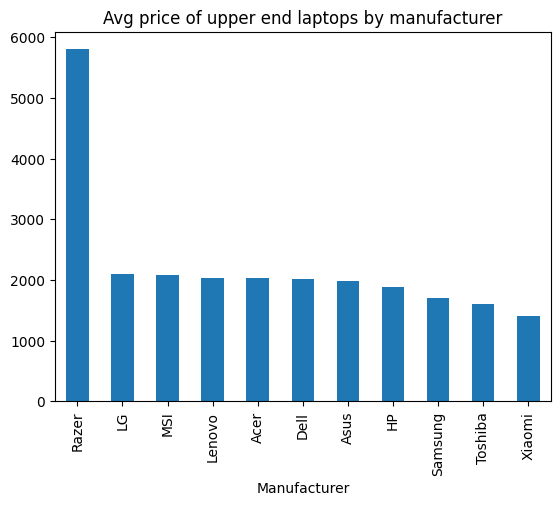

In [211]:
best_laptops_mean.plot(kind='bar', title="Avg price of upper end laptops by manufacturer")

2.4) Min-Max analiza
1. izpišite najtežji in najlažji ekran proizvajalca Dell

In [216]:
df_analiza.loc[df_analiza["Manufacturer"] == 'Dell'].sort_values(by=['weight_kg'],ascending=[False]).head(1)


,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price (Euros),screen_size,ram_size,weight_kg,storage_size,price_eur
841,Dell,Alienware 17,Gaming,"17.3""",IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,32GB,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows,10,4.42kg,"3072,89",17.299999,32,4.42,512,3072.889893


In [217]:
df_analiza.loc[df_analiza["Manufacturer"] == 'Dell'].sort_values(by=['weight_kg'],ascending=[True]).head(1)

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price (Euros),screen_size,ram_size,weight_kg,storage_size,price_eur
761,Dell,Latitude 7280,Ultrabook,"12.5""",Full HD 1920x1080,Intel Core i7 7600U 2.8GHz,16GB,256GB SSD,Intel HD Graphics 620,Windows,10,1.18kg,"1859,00",12.5,16,1.18,256,1859.0
